In [1]:
cd("$(homedir())/Documents/Repos/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lisah\Documents\Repos\enso_project.jl`


In [2]:
using ReservoirComputing, CSV, DataFrames, DynamicalSystems, Plots, enso_project, Statistics

┌ Warning: Package cuDNN not found in current path.
│ - Run `import Pkg; Pkg.add("cuDNN")` to install the cuDNN package, then restart julia.
│ - If cuDNN is not installed, some Flux functionalities will not be available when running on the GPU.
└ @ FluxCUDAExt C:\Users\lisah\.julia\packages\Flux\9PibT\ext\FluxCUDAExt\FluxCUDAExt.jl:10


In [3]:
data = Matrix(transpose(Matrix(CSV.read("data/sst_data/sst_34_anomaly_embedded.txt", DataFrame; delim=',', ignorerepeated=true, header=false))))

5×493 Matrix{Float64}:
  0.08  -0.2   -0.14   0.02   0.49  …  -0.93  -0.85  -0.93  -0.84  -0.69
  0.27   0.86   1.24   1.73   1.68     -0.01   0.19   0.47   0.88   1.07
  2.13   1.81   1.22   0.68   0.68      1.53   1.59   1.9    1.99   1.78
 -0.33  -0.44  -0.38  -1.02  -1.29      1.24   0.81   0.31   0.24   0.21
 -0.96  -0.16  -0.52  -0.54  -0.69     -0.15  -0.28  -0.14  -0.62  -0.71

In [4]:
spectral_radii = [0.8, 0.9, 1.0]
sparsities = [0.05, 0.08, 0.1, 0.2]
input_scales = [0.1, 0.5, 1.0, 2.0]
ridge_values = [0.0, 1e-6, 1e-5]
reservoir_sizes = [90, 120, 135, 140, 160, 180, 200]

param_grid = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values);

In [5]:
train_size = 250
initial_val_size = 40;

In [6]:
# sample size N
N = 100

# lead time L
L = 30

30

In [7]:
function sample_lead_times(L, N, data, train_size, initial_val_size, param_grid)
    datasets_test = zeros(N,L)
    predictions = zeros(N,L)

    for n in 0:(N-1)
        # include data shift n
        train_data = data[:, 1:train_size]
        val_data = data[:, train_size+1:train_size+initial_val_size+n]
        test_data = data[:, train_size+initial_val_size+n+1:train_size+initial_val_size+n+L]

        # train
        esn, W_out, val_loss = enso_project.cross_validate_esn(train_data, val_data, param_grid) 
        prediction = enso_project.esn_eval_pred(esn, W_out, test_data)

        # store 
        datasets_test[n+1,:] = test_data[1,:]
        predictions[n+1,:] = prediction

        # progress control
        println("Finished sample $(n+1)")
    end
    return predictions, datasets_test
end

sample_lead_times (generic function with 1 method)

In [59]:
predictions, datasets_test = sample_lead_times(L,N,data, train_size, initial_val_size,param_grid)

enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 60.17139220033001
enso_project.ESNHyperparams(90, 0.8, 0.08, 0.1, 0.0)
Validation loss = 58.54290190542775
enso_project.ESNHyperparams(120, 0.9, 0.08, 0.1, 0.0)
Validation loss = 23.259733131659527
Finished sample 1
enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 62.83090412933103
enso_project.ESNHyperparams(90, 0.8, 0.08, 0.1, 0.0)
Validation loss = 62.71893123870804
enso_project.ESNHyperparams(120, 0.9, 0.08, 0.1, 0.0)
Validation loss = 24.414995396233284
Finished sample 2
enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 66.51376992203281
enso_project.ESNHyperparams(120, 0.9, 0.08, 0.1, 0.0)
Validation loss = 26.283394338996658
Finished sample 3
enso_project.ESNHyperparams(90, 0.8, 0.05, 0.1, 0.0)
Validation loss = 71.29989750868222
enso_project.ESNHyperparams(120, 0.9, 0.08, 0.1, 0.0)
Validation loss = 28.741546083680017
Finished sample 4
enso_project.ESNHyperparams(90

([-0.6968011432858845 -0.33421746422054444 … -0.7664314013530447 -0.460320500804337; -0.3080033150650173 -0.11562888376538441 … 0.3829281375939637 0.4748420317611358; … ; 0.48140927886332896 0.3567208765149377 … -1.1609801192700773 -1.1764024944177998; 0.40345662826306944 -0.0572518950375306 … -0.8276946542298252 -0.8688342181693574], [-0.66 -0.28 … -0.27 -0.07; -0.28 -0.06 … -0.07 -0.24; … ; 0.45 0.47 … -0.43 -0.7; 0.47 -0.03 … -0.7 -0.64])

In [60]:

CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L$(L)_N$(N)_predictions.csv", DataFrame(predictions, :auto))
CSV.write("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L$(L)_N$(N)_testsets.csv", DataFrame(datasets_test, :auto))


"C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L30_N100_testsets.csv"

In [9]:
predictions = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L$(L)_N$(N)_predictions.csv", DataFrame))
datasets_test = Matrix(CSV.read("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/error_saves/enso_L$(L)_N$(N)_testsets.csv", DataFrame));

In [10]:
"""
    function rmse(predictions::AbstractMatrix, test_data::AbstractMatrix)
       
compute the rmse between predicitons and test data for each lead time. Is considered good if smaller 1.4.

# Arguments:
    - `predicitons::AbstractMatrix`: predictions, NxL matrix. N is sample size per lead time, L is all lead times considered
    - `test_data::AbstractMatrix`: test data for each sample, NxL matrix.

# Returns:
    - `Vector`: RMSE for each lead time, vector of length L
"""
function rmse(predictions::AbstractMatrix, test_data::AbstractMatrix)
    N, L = size(predictions, 1), size(predictions,2)
    sse_vals = zeros(N,L)
    sse_vals = (predictions .- test_data).^2
    rmse = sqrt.(sum(sse_vals, dims=1) ./N)
    return rmse[1,:]
end

rmse

In [11]:
"""
    function pcc(predictions::AbstractMatrix, test_data::AbstractMatrix)

Compute the Pearson-Correlation-Coefficient between sample and test data for each lead time considered. I.e., PCC is computed between respective data columns.
Is considered good, if > 0.5.

# Arguments:
    - `predicitons::AbstractMatrix`:  predictions, NxL matrix. N is sample size per lead time, L is all lead times considered
    - `test_data::AbstractMatrix`: test data for each sample, NxL matrix.

# Returns:
    - `Vector`: PCC for each lead time, vector of length L
"""
function pcc(predictions::AbstractMatrix, test_data::AbstractMatrix)
    L = size(predictions, 2)
    return [cor(predictions[:,i], test_data[:,i]) for i in 1:L]
end

pcc

In [12]:
"""
    function hss(predictions::AbstractMatrix, test_data::AbstractMatrix)

Measures accuracy of predictions (wrt randomly generated forecast). ENSO predicted if abs(ONI)>0.5. Compute ratio out of TP,TN,FP,FN.
Is considered good if >0.5.
Formula from paper "Long-term ENSO prediction with echo-state networks" by Hassanibesheli F. et al.

# Arguments:
    - `predicitons::AbstractMatrix`:  predictions, NxL matrix. N is sample size per lead time, L is all lead times considered
    - `test_data::AbstractMatrix`: test data for each sample, NxL matrix.

# Returns:
    - `Vector`: HSS for each lead time, vector of length L
"""
function hss(predictions::AbstractMatrix, test_data::AbstractMatrix)

    # predict event if indec > 0.5
    events_pred = abs.(Int.(round.(predictions)))
    events_true = abs.(Int.(round.(test_data)))

    # compute TN
    TN_mat = events_pred + events_true
    TN = sum(TN_mat .== 0, dims=1)

    # compute FP,FN,TP
    compare = events_pred - events_true # matrix: 0 for TP, TN; 1 for FP, -1 for FN
    FP = sum(compare .== 1, dims=1)
    FN = sum(compare .==-1, dims=1)
    TP = sum(compare .==0, dims=1) .- TN

    N = TN + TP + FN + FP # should be sample size

    # calculate formula
    CRF = ((TP .+ FN) .* (TP .+ FP) .+ (TN .+ FN) .* (TN .+ FP)) ./ N
    HSS = (TP .+ TN .- CRF) ./ (N .- CRF)
    return HSS[1,:]
end

hss

In [13]:
pcc_vals = pcc(predictions, datasets_test);
rmse_vals = rmse(predictions, datasets_test);
hss_vals = hss(predictions, datasets_test);

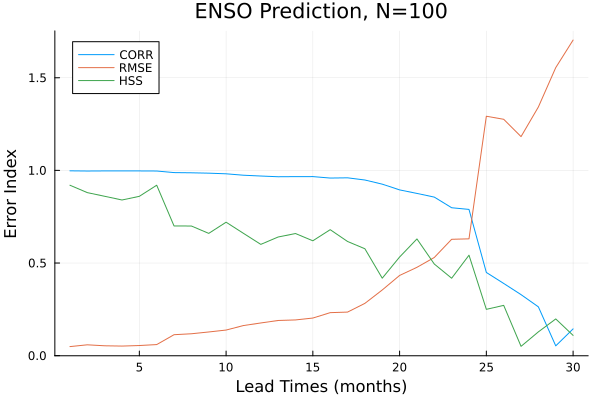

In [21]:
plot(pcc_vals, label="CORR", xlabel="Lead Times (months)", ylabel="Error Index", title="ENSO Prediction, N=100")
plot!(rmse_vals, label="RMSE")
plot!(hss_vals, label="HSS")
#savefig("C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/fig_saves/enso_error.png")